In [1]:
import os

from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
PATH = Path('/data/airbus/')
MASK_PATH = PATH/'train_masks/'

In [9]:
list(PATH.iterdir())

[PosixPath('/data/airbus/sample_submission.csv'),
 PosixPath('/data/airbus/train_ship_segmentations.csv'),
 PosixPath('/data/airbus/train'),
 PosixPath('/data/airbus/test'),
 PosixPath('/data/airbus/train_masks')]

In [33]:
list(MASK_PATH.iterdir())[:15]

[PosixPath('/data/airbus/train_masks/2f7006078.png'),
 PosixPath('/data/airbus/train_masks/bffdaa7aa.png'),
 PosixPath('/data/airbus/train_masks/7490438f1.png'),
 PosixPath('/data/airbus/train_masks/2c9c48b4b.png'),
 PosixPath('/data/airbus/train_masks/4a2f199f1.png'),
 PosixPath('/data/airbus/train_masks/8e0846a9e.png'),
 PosixPath('/data/airbus/train_masks/4a92d7048.png'),
 PosixPath('/data/airbus/train_masks/4a86316a8.png'),
 PosixPath('/data/airbus/train_masks/41265c303.png'),
 PosixPath('/data/airbus/train_masks/96239dea3.png'),
 PosixPath('/data/airbus/train_masks/55072cfe8.png'),
 PosixPath('/data/airbus/train_masks/911674ef6.png'),
 PosixPath('/data/airbus/train_masks/b1d2ee83b.png'),
 PosixPath('/data/airbus/train_masks/80dcfdc84.png'),
 PosixPath('/data/airbus/train_masks/c77dc13c5.png')]

In [4]:
segments = pd.read_csv(PATH/'train_ship_segmentations.csv')
segments.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
2,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
3,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
4,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...


In [34]:
segments[segments['ImageId'] == 'c77dc13c5.jpg']

,ImageId,EncodedPixels
102182,c77dc13c5.jpg,NaN


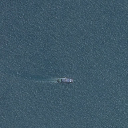

In [35]:
Image.open(PATH/'train/000155de5.jpg').resize((128, 128))

In [41]:
import cv2
x = cv2.imread(f'{MASK_PATH}/000155de5.png')[..., 0]
print(np.all(x == 0))
x.sum()

False


3388

In [42]:
%%timeit
x = cv2.imread(f'{MASK_PATH}/000155de5.png')[..., 0]

4.48 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
x = open_image(MASK_PATH/'000155de5.png')

8.18 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
import matplotlib.pyplot as plt

In [46]:
%%timeit
x = plt.imread(f'{MASK_PATH}/000155de5.png')

9.1 ms ± 51.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
x = Image.open(f'{MASK_PATH}/000155de5.png')
np.array(x)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
x = np.zeros((768, 768))
x[:] = 255

In [70]:
import sys
sys.getsizeof(x)

4718704

In [86]:
def rle_decode_mine(encoded, height = 768, width = 768):
    m_f = np.zeros(height * width, dtype = np.uint8)
    pixels = encoded[::2]
    num = encoded[1::2]

    # Iterate through the pixels
    for start, n_p in zip(pixels, num):
        m_f[start: start + n_p] = 255

    return m_f.reshape((height, width)).T

In [87]:
mask = rle_decode_mine(np.array(segments.loc[1, 'EncodedPixels'].split(), int))

In [88]:
sys.getsizeof(mask)

112

In [91]:
cv2.imwrite('mask_cv2.png', mask)

True

In [89]:
Image.fromarray(mask).save('mask.png')

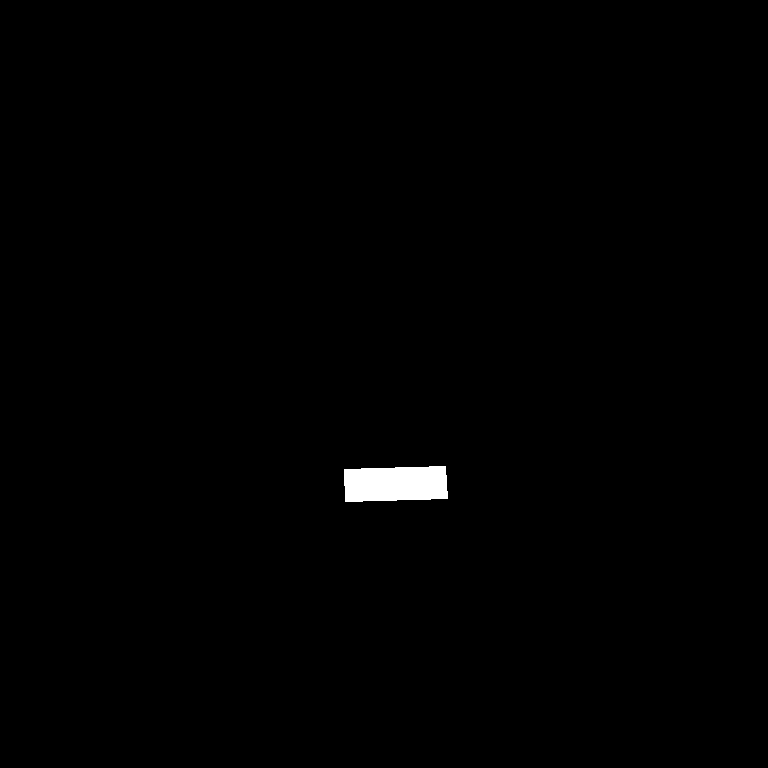

In [90]:
Image.open('mask.png')

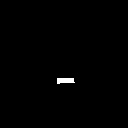

In [78]:
Image.fromarray(mask).resize((128, 128))

In [57]:
img2 = Image.new('L', (1920, 1080), 255)
img2.save('test.png')

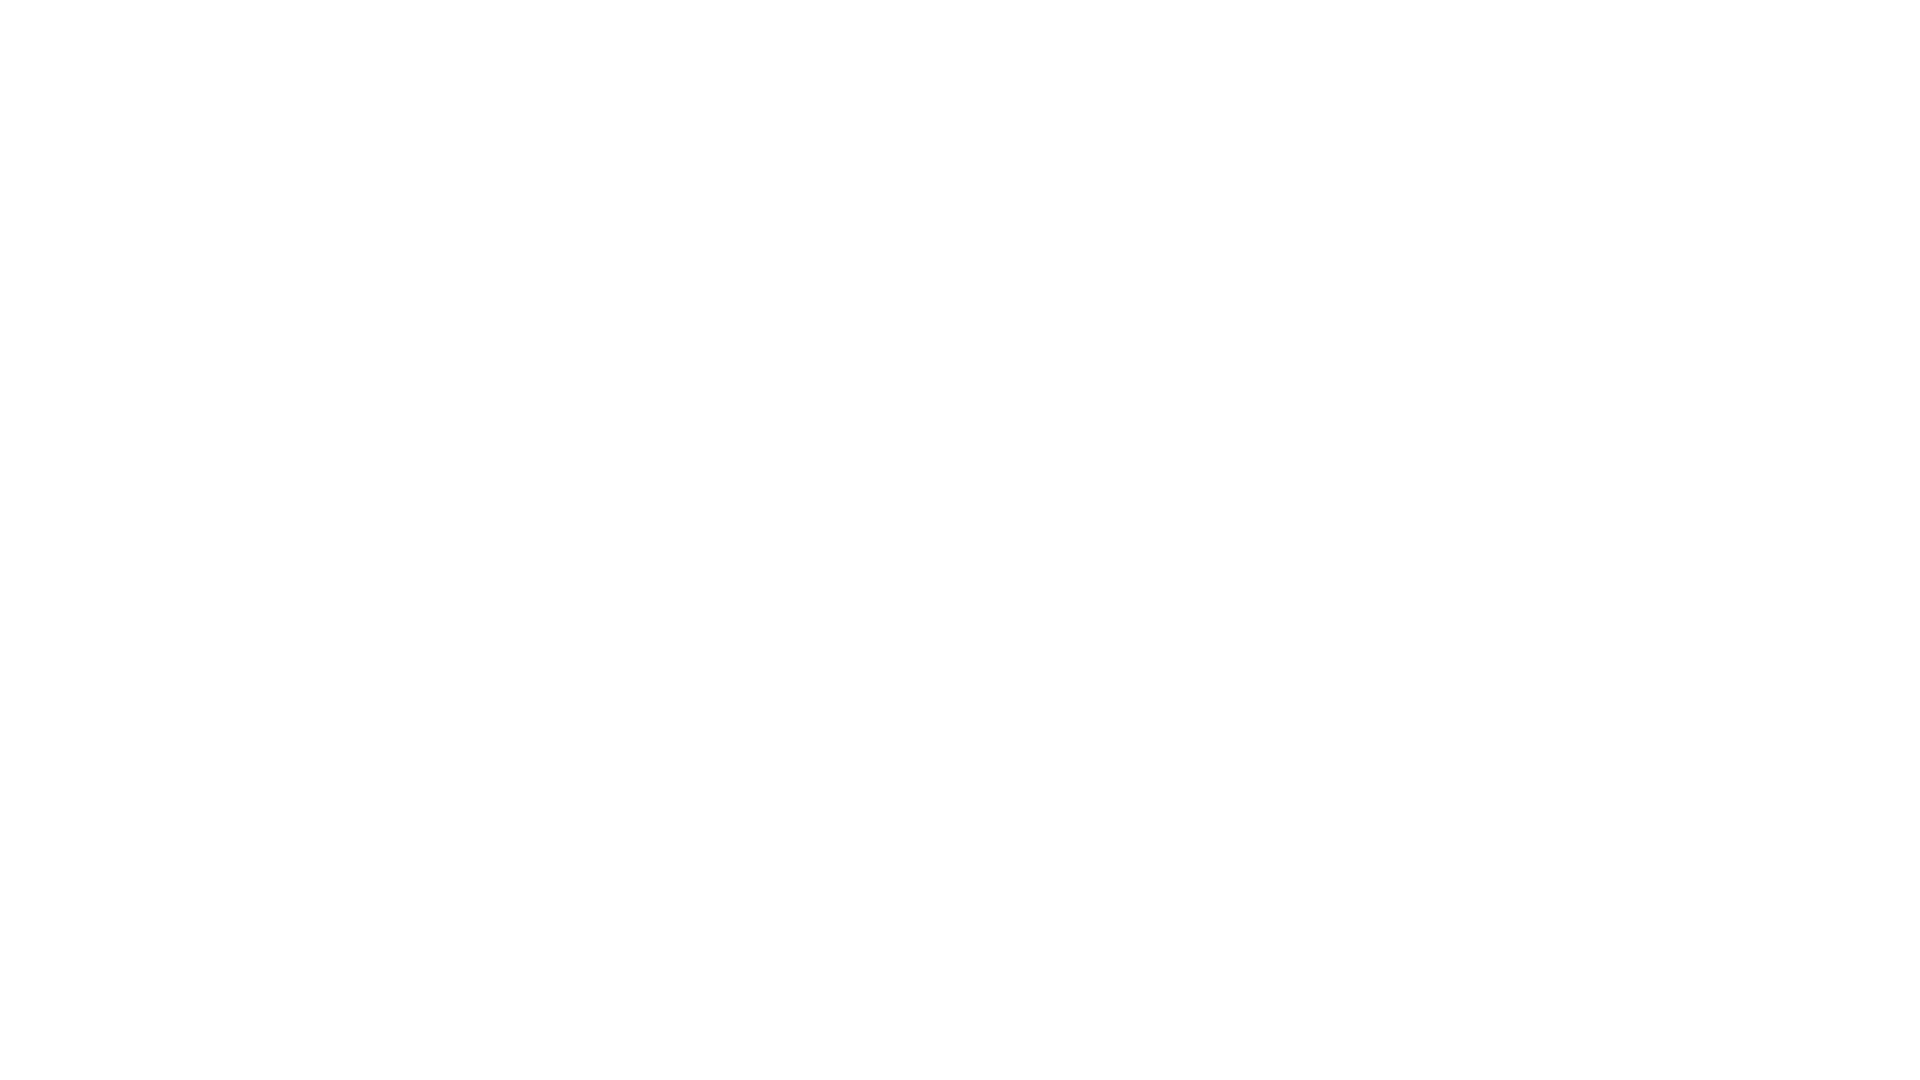

In [58]:
Image.open('test.png')

In [38]:
import numpy as np
np.array(x).sum()

0.0